In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

%matplotlib inline

In [2]:
#2.Defining path ,importing dataset, and cleaning

# Defining Path
path=r'/Users/marieanek2/Documents/Youtube Trending Analysis'

In [3]:
# Importing Data set

df= pd.read_csv(os.path.join(path,'02 Data','Prepared Data','ALLvideos.csv'),index_col = False)

In [4]:
# Data Cleaning
df.columns

Index(['Unnamed: 0', 'country', 'channel_title', 'category_id', 'views',
       'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

In [5]:
df.head(20)

,Unnamed: 0,country,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,US,CaseyNeistat,22,748374,57527,2966,15954,False,False,False
1,1,US,LastWeekTonight,24,2418783,97185,6146,12703,False,False,False
2,2,US,Rudy Mancuso,23,3191434,146033,5339,8181,False,False,False
3,3,US,Good Mythical Morning,24,343168,10172,666,2146,False,False,False
4,4,US,nigahiga,24,2095731,132235,1989,17518,False,False,False
5,5,US,iJustine,28,119180,9763,511,1434,False,False,False
6,6,US,Saturday Night Live,24,2103417,15993,2445,1970,False,False,False
7,7,US,CrazyRussianHacker,28,817732,23663,778,3432,False,False,False
8,8,US,20th Century Fox,1,826059,3543,119,340,False,False,False
9,9,US,Vox,25,256426,12654,1363,2368,False,False,False


In [6]:
NumData=df[['views', 'likes', 'dislikes','comment_count']]

In [7]:
# Elbow technique
num_cl = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [8]:
score = [kmeans[i].fit(NumData).score(NumData) for i in range(len(kmeans))] 

In [9]:
score

[-1.8333961869445304e+19,
 -7.971490281039878e+18,
 -3.798104657566842e+18,
 -2.2638786357687452e+18,
 -1.5209974977488594e+18,
 -1.1357031147149626e+18,
 -8.272423073571291e+17,
 -6.535316574937034e+17,
 -5.281868841397739e+17,
 -4.219118713740715e+17,
 -3.5326609668762086e+17,
 -2.97035635379579e+17,
 -2.59233819675047e+17,
 -2.2120234020861827e+17,
 -1.9104128479317424e+17,
 -1.6895367238193155e+17,
 -1.484625855949171e+17,
 -1.3186109237286774e+17,
 -1.1957827370230634e+17]

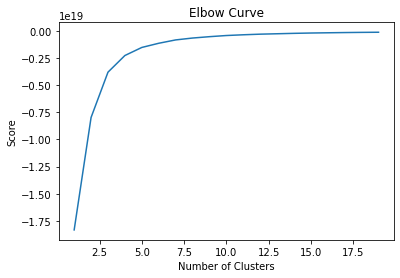

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [11]:
# Creating k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [12]:
kmeans.fit(NumData)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [13]:
NumData['clusters'] = kmeans.fit_predict(NumData)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-13-0b656ca04f1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NumData['clusters'] = kmeans.fit_predict(NumData)


In [14]:
NumData.head()

,views,likes,dislikes,comment_count,clusters
0,748374,57527,2966,15954,0
1,2418783,97185,6146,12703,0
2,3191434,146033,5339,8181,0
3,343168,10172,666,2146,0
4,2095731,132235,1989,17518,0


In [15]:
NumData['clusters'].value_counts()

0    301366
1      2447
2       210
Name: clusters, dtype: int64

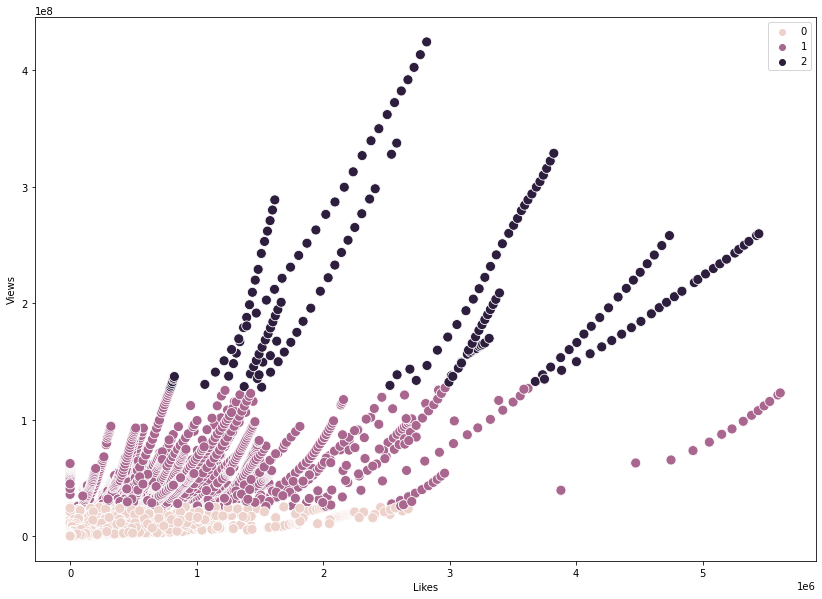

In [16]:
# Plot the clusters for the "views" and "likes" variables.

plt.figure(figsize=(14,10))
ax = sns.scatterplot(x=NumData['likes'], y=NumData['views'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Likes') # Label x-axis.
plt.ylabel('Views') # Label y-axis.
plt.show()

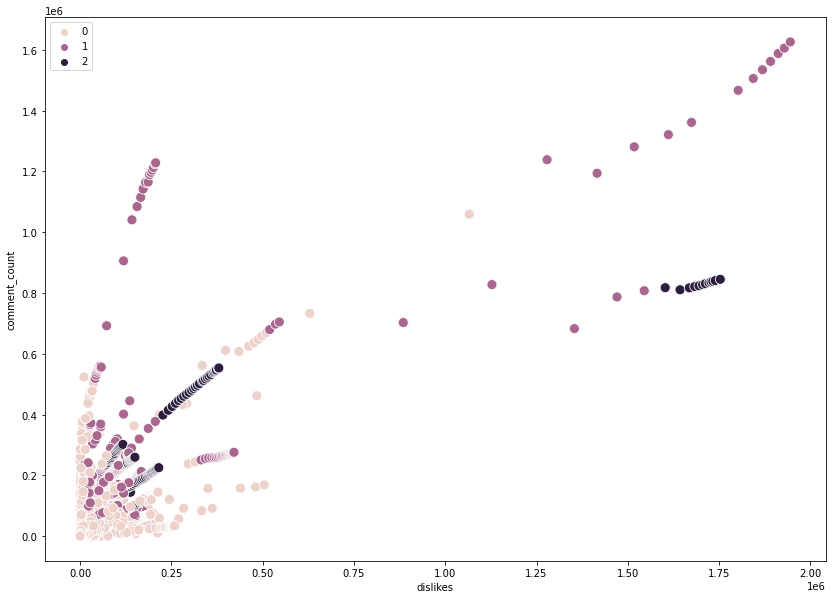

In [17]:
# Plot the clusters for the "comment_count" and "views" variables.

plt.figure(figsize=(14,10))
ax = sns.scatterplot(x=NumData['dislikes'], y=NumData['comment_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('dislikes') 
plt.ylabel('comment_count') 
plt.show()

In [18]:
NumData.loc[NumData['clusters'] == 2, 'cluster'] = 'Burgundy '
NumData.loc[NumData['clusters'] == 1, 'cluster'] = 'pink'
NumData.loc[NumData['clusters'] == 0, 'cluster'] = 'coral'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [19]:
NumData.groupby('cluster').agg({'dislikes':['mean', 'median'], 
                         'comment_count':['mean', 'median'], 
                      'views':['mean', 'median'],
                          'likes':['mean', 'median']})

dislikes            comment_count                   views  \
                    mean    median           mean    median          mean   
cluster                                                                     
Burgundy   269363.447619  138033.5  255236.633333  196723.5  2.052722e+08   
coral        1600.650276     186.0    3610.861431     565.0  9.271053e+05   
pink        73361.661218   32690.0  117441.571312   52013.0  4.981914e+07   

                               likes           
                median          mean   median  
cluster                                        
Burgundy   189786345.5  2.954710e+06  3093544  
coral         169932.5  3.182446e+04     4066  
pink        43449654.0  1.061775e+06   825540

### NOTES

#### The Burgundy cluster statistics stand out more than the Pink and even much more than the coral but also have the highest number of comments and followed by pink and coral the least.